### A First, Naive Learned Index on Log normal dataset
This is an implementation of learning indexes using neural networks as described in the recent [paper](https://arxiv.org/pdf/1712.01208.pdf) from google.

##### some variable initialisations

In [1]:
mu, sigma = 3., 1. # mean and standard deviation
num_datapoints = 10000

##### Importing libraries and preparing training data to be indexed

In [23]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
s = np.random.lognormal(mu, sigma, num_datapoints)
np_data = np.asarray(sorted(s))
np_data.shape

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(10000,)

##### Using pytorch to train a neural network to learn the indexes of the dataset (s)

In [15]:
import torch
from index_learner import *
D_in, H, D_out =  1, 100, 1
model = torch.nn.Sequential(
        torch.nn.Linear(D_in, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, D_out),
    )
x = torch.FloatTensor(np_data.reshape(num_datapoints,1)[:,:])
plot_step,plot_lossess,model = learn_index(num_datapoints,x,model)

0 4990.1318359375
1000 1252.58984375
2000 476.64935302734375
3000 131.3181915283203
4000 63.64436721801758


##### Time taken by model to predict index positions for all points in the dataset (s)

In [19]:
%%time
predicted_index,error_predicted_index = predict_indexes(num_datapoints,model,x)

Total datapoint: 10000
CPU times: user 711 ms, sys: 43.8 ms, total: 755 ms
Wall time: 797 ms


##### Various plots to visually understand the dataset, model trainig and index predictions.
Plot 2 shows that the error in predicted_index is very low usually around zero for most of the dataset. This is an encouraging result for a naive approach in using neural network for learning indexes.

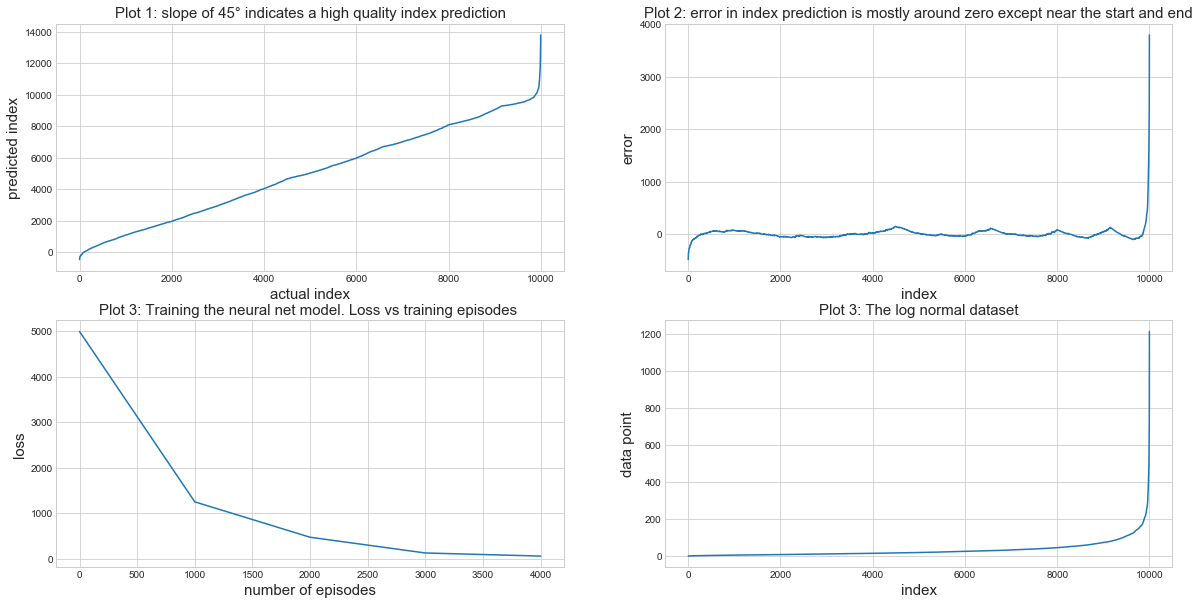

In [22]:
plot_results(num_datapoints,predicted_index,error_predicted_index
                ,plot_step,plot_lossess,np_data)